# RFQ (Request for Quote) Analysis - KPI Dashboard

## Objective
Analyze RFQ data to calculate key performance indicators:
- **RFQs Received**: Count of incoming requests
- **Quotes Submitted**: Number of RFQs responded to
- **Conversion Rate**: % of quotes converted into orders
- **Average Response Time**: Time between RFQ receipt and quote submission
- **Price Competitiveness**: How closely the quoted price aligns with the winning quote

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load the CSV file
df = pd.read_csv('/home/user/Downloads/quotegenerated.csv')

print(f"Dataset loaded successfully!")
print(f"Total rows: {len(df)}, Total columns: {len(df.columns)}\n")
df.info()

Dataset loaded successfully!
Total rows: 183, Total columns: 68

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 68 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    183 non-null    int64  
 1   customer_id           183 non-null    int64  
 2   created_by            0 non-null      float64
 3   level                 183 non-null    object 
 4   created_at            183 non-null    object 
 5   updated_by            183 non-null    object 
 6   rfq_id                183 non-null    int64  
 7   status                183 non-null    object 
 8   id-2                  183 non-null    int64  
 9   custom_rfq_id         173 non-null    object 
 10  rfq_id-2              25 non-null     object 
 11  prf_id                16 non-null     float64
 12  rqf_title             176 non-null    object 
 13  rqf_desc              150 non-null    object 
 14  currency 

In [2]:
# Display sample data
print("\nSample Data (First 5 rows):")
print(df.head())

print("\nKey Columns for KPI Analysis:")
print("- RFQ ID: rfq_id, rfq_unique_id")
print("- Quote ID: quote_id, id")
print("- Status: status, rfq_status, seller_status, buyer_color_code")
print("- Dates: created_at, publish_date, expiry_date, cdate, mdate")
print("- Price: unitPrice, offeredQty, discount_percentage")
print("- Conversion: status values like 'awarded', 'po_generated', 'quote_sent'")


Sample Data (First 5 rows):
   id  customer_id  created_by level                     created_at  \
0  18          550         NaN    L3   2024-12-05 11:25:22.13135+00   
1  19          551         NaN    L4  2024-12-05 11:25:22.132854+00   
2  38          549         NaN    L2  2024-12-06 10:18:26.683366+00   
3  40          549         NaN    L2  2024-12-06 10:36:17.792447+00   
4  41          548         NaN    L1  2024-12-06 10:49:42.210584+00   

                      updated_by  rfq_id status  id-2 custom_rfq_id  \
0  2024-12-05 11:25:22.131353+00     265      A    18       Tarsons   
1  2024-12-05 11:25:22.132857+00     265      A    19     rfq576031   
2  2024-12-06 10:18:26.683372+00     286      A    38         RFQ-4   
3  2024-12-06 10:36:17.792454+00     287      A    40         RFQ-4   
4  2024-12-06 10:49:42.210592+00     288      A    41    RFQ-ELOWMz   

     rfq_id-2  prf_id                     rqf_title  \
0         NaN     NaN  Tarsons -20°C Mini Cooler 32   
1      

## Data Preprocessing & Cleaning

In [3]:
# Convert date columns to datetime
date_columns = ['created_at', 'publish_date', 'expiry_date', 'created_at-2', 
                'updated_at', 'cdate', 'mdate', 'cdate-2', 'mdate-2', 'cdate-3', 'mdate-3']

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert numeric columns
numeric_columns = ['offeredQty', 'unitPrice', 'discount_percentage', 
                   'gst', 'shipping_charges', 'logistics_charges', 'insurance_charges']

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data preprocessing completed")
print(f"Date range: {df['created_at'].min()} to {df['created_at'].max()}")
print(f"Total unique RFQs: {df['rfq_id'].nunique()}")
print(f"Total quotes: {len(df)}")

Data preprocessing completed
Date range: 2024-12-05 11:25:22.131350+00:00 to 2025-05-20 05:29:31.376062+00:00
Total unique RFQs: 137
Total quotes: 183


## KPI Calculations

In [4]:
# KPI 1: RFQs Received (Count of incoming requests)
rfqs_received = df['rfq_id'].nunique()

print("\nKPI 1: RFQs RECEIVED")
print(f"Total RFQs Received: {rfqs_received}")

# Breakdown by status
print("\nRFQ Status Distribution:")
rfq_status_dist = df.groupby('rfq_status')['rfq_id'].nunique()
for status, count in rfq_status_dist.items():
    print(f"  {status}: {count} RFQs")

# Breakdown by level
print("\nRFQ Level Distribution:")
level_dist = df.groupby('level')['rfq_id'].nunique()
for level, count in level_dist.items():
    print(f"  {level}: {count} RFQs")


KPI 1: RFQs RECEIVED
Total RFQs Received: 137

RFQ Status Distribution:
  1: 37 RFQs
  2: 43 RFQs
  3: 1 RFQs
  5: 2 RFQs
  6: 23 RFQs
  8: 13 RFQs
  9: 17 RFQs
  10: 11 RFQs
  11: 1 RFQs
  14: 10 RFQs
  15: 4 RFQs

RFQ Level Distribution:
  L1: 91 RFQs
  L2: 85 RFQs
  L3: 3 RFQs
  L4: 2 RFQs


In [5]:
# KPI 2: Quotes Submitted (Number of RFQs responded to)
quotes_submitted = len(df)
rfqs_responded_to = df['rfq_id'].nunique()

print("\nKPI 2: QUOTES SUBMITTED")
print(f"Total Quotes Submitted: {quotes_submitted}")
print(f"RFQs Responded To: {rfqs_responded_to}")
print(f"Avg Quotes per RFQ: {quotes_submitted / rfqs_responded_to:.2f}")

# Breakdown by seller status
print("\nQuote Status Distribution:")
quote_status_dist = df['seller_status'].value_counts()
for status, count in quote_status_dist.items():
    percentage = (count / quotes_submitted) * 100
    print(f"  {status}: {count} quotes ({percentage:.1f}%)")


KPI 2: QUOTES SUBMITTED
Total Quotes Submitted: 183
RFQs Responded To: 137
Avg Quotes per RFQ: 1.34

Quote Status Distribution:
  Quote Released: 99 quotes (54.1%)
  PO Generated: 55 quotes (30.1%)
  Quote Cancelled: 16 quotes (8.7%)
  Quote Won: 9 quotes (4.9%)
  Quote Rejected: 3 quotes (1.6%)
  RFQ Cancelled: 1 quotes (0.5%)


In [6]:
# KPI 3: Conversion Rate (% of quotes converted into orders)

# Define conversion statuses (won/awarded/PO generated)
conversion_statuses = ['awarded', 'po_generated', 'Quote Won', 'PO Generated']
converted_quotes = df[df['seller_status'].isin(conversion_statuses)]
converted_count = len(converted_quotes)

conversion_rate = (converted_count / quotes_submitted) * 100

print("\nKPI 3: CONVERSION RATE")
print(f"Total Converted Quotes: {converted_count}")
print(f"Conversion Rate: {conversion_rate:.2f}%")

# Breakdown by conversion type
print("\nConversion Type Distribution:")
conversion_dist = converted_quotes['seller_status'].value_counts()
for status, count in conversion_dist.items():
    percentage = (count / converted_count) * 100 if converted_count > 0 else 0
    print(f"  {status}: {count} quotes ({percentage:.1f}%)")

# Additional insights
print("\nOther Status Categories:")
approved = len(df[df['seller_status'].str.contains('approved|Approved', na=False, case=False)])
pending = len(df[df['seller_status'].str.contains('pending|waiting', na=False, case=False)])
cancelled = len(df[df['seller_status'].str.contains('cancel|reject', na=False, case=False)])
sent = len(df[df['seller_status'].str.contains('sent|Released|Received', na=False, case=False)])

print(f"  Approved: {approved} quotes ({(approved/quotes_submitted)*100:.1f}%)")
print(f"  Pending Approval: {pending} quotes ({(pending/quotes_submitted)*100:.1f}%)")
print(f"  Cancelled/Rejected: {cancelled} quotes ({(cancelled/quotes_submitted)*100:.1f}%)")
print(f"  Sent/Released: {sent} quotes ({(sent/quotes_submitted)*100:.1f}%)")


KPI 3: CONVERSION RATE
Total Converted Quotes: 64
Conversion Rate: 34.97%

Conversion Type Distribution:
  PO Generated: 55 quotes (85.9%)
  Quote Won: 9 quotes (14.1%)

Other Status Categories:
  Approved: 0 quotes (0.0%)
  Pending Approval: 0 quotes (0.0%)
  Cancelled/Rejected: 20 quotes (10.9%)
  Sent/Released: 99 quotes (54.1%)


In [7]:
# KPI 4: Average Response Time (Time between RFQ receipt and quote)

# Calculate response time: difference between quote creation and RFQ publish
# - publish_date: When RFQ was published
# - created_at-2: When quote was created/submitted
df['response_time_hours'] = (df['created_at-2'] - df['publish_date']).dt.total_seconds() / 3600

# Filter valid response times (positive values only)
valid_response_times = df[df['response_time_hours'] > 0]['response_time_hours']

print("\nKPI 4: AVERAGE RESPONSE TIME")
print("Definition: Time between RFQ publish date and quote submission")

if len(valid_response_times) > 0:
    avg_response_time = valid_response_times.mean()
    median_response_time = valid_response_times.median()
    min_response_time = valid_response_times.min()
    max_response_time = valid_response_times.max()
    
    print(f"Average Response Time: {avg_response_time:.2f} hours ({avg_response_time/24:.2f} days)")
    print(f"Median Response Time: {median_response_time:.2f} hours ({median_response_time/24:.2f} days)")
    print(f"Fastest Response: {min_response_time:.2f} hours ({min_response_time/24:.2f} days)")
    print(f"Slowest Response: {max_response_time:.2f} hours ({max_response_time/24:.2f} days)")
    
    # Response time distribution
    print("\nResponse Time Distribution:")
    bins = [0, 1, 6, 24, 72, 168, float('inf')]
    labels = ['<1 hour', '1-6 hours', '6-24 hours', '1-3 days', '3-7 days', '>7 days']
    df['response_time_category'] = pd.cut(df['response_time_hours'], bins=bins, labels=labels)
    
    response_dist = df['response_time_category'].value_counts().sort_index()
    for category, count in response_dist.items():
        percentage = (count / len(valid_response_times)) * 100
        print(f"  {category}: {count} quotes ({percentage:.1f}%)")
    
    # Additional analysis by seller
    print("\nResponse Time by Seller (Top 10 fastest):")
    seller_response = df[df['response_time_hours'] > 0].groupby('seller_id-2')['response_time_hours'].agg(['mean', 'count'])
    seller_response = seller_response[seller_response['count'] >= 2].sort_values('mean').head(10)
    for seller_id, row in seller_response.iterrows():
        print(f"  Seller {seller_id}: {row['mean']:.1f} hours avg ({row['count']:.0f} quotes)")
else:
    print("No valid response time data found")
    print("Please check if 'publish_date' and 'created_at-2' columns have valid dates")


KPI 4: AVERAGE RESPONSE TIME
Definition: Time between RFQ publish date and quote submission
Average Response Time: 88.82 hours (3.70 days)
Median Response Time: 67.35 hours (2.81 days)
Fastest Response: 0.05 hours (0.00 days)
Slowest Response: 281.29 hours (11.72 days)

Response Time Distribution:
  <1 hour: 7 quotes (5.1%)
  1-6 hours: 8 quotes (5.8%)
  6-24 hours: 13 quotes (9.5%)
  1-3 days: 49 quotes (35.8%)
  3-7 days: 38 quotes (27.7%)
  >7 days: 22 quotes (16.1%)

Response Time by Seller (Top 10 fastest):
  Seller 93: 11.2 hours avg (3 quotes)
  Seller 541: 66.5 hours avg (2 quotes)
  Seller 91: 83.3 hours avg (75 quotes)
  Seller 509: 100.9 hours avg (57 quotes)


### PostgreSQL Query for KPI 4: Average Response Time

In [8]:
# KPI 5: Price Competitiveness (How closely quoted price aligns with winning quote)

# For each RFQ, find the winning quote price and compare with all quotes
price_competitiveness_data = []

for rfq_id in df['rfq_id'].unique():
    rfq_quotes = df[df['rfq_id'] == rfq_id].copy()
    
    # Find winning/awarded quotes
    winning_quotes = rfq_quotes[rfq_quotes['seller_status'].isin(conversion_statuses)]
    
    if len(winning_quotes) > 0 and len(rfq_quotes) > 1:
        # Calculate effective price (unitPrice after discount)
        rfq_quotes['effective_price'] = rfq_quotes['unitPrice'] * (1 - rfq_quotes['discount_percentage'] / 100)
        winning_quotes_copy = winning_quotes.copy()
        winning_quotes_copy['effective_price'] = winning_quotes_copy['unitPrice'] * (1 - winning_quotes_copy['discount_percentage'] / 100)
        
        winning_price = winning_quotes_copy['effective_price'].mean()
        
        for _, quote in rfq_quotes.iterrows():
            if not pd.isna(quote['effective_price']) and winning_price > 0:
                price_diff_pct = ((quote['effective_price'] - winning_price) / winning_price) * 100
                price_competitiveness_data.append({
                    'rfq_id': rfq_id,
                    'quote_id': quote['quote_id'],
                    'quoted_price': quote['effective_price'],
                    'winning_price': winning_price,
                    'price_diff_pct': price_diff_pct,
                    'is_winner': quote['seller_status'] in conversion_statuses
                })

price_comp_df = pd.DataFrame(price_competitiveness_data)

print("\nKPI 5: PRICE COMPETITIVENESS")

if len(price_comp_df) > 0:
    avg_price_diff = price_comp_df['price_diff_pct'].mean()
    median_price_diff = price_comp_df['price_diff_pct'].median()
    
    print(f"Average Price Difference from Winning Quote: {avg_price_diff:.2f}%")
    print(f"Median Price Difference: {median_price_diff:.2f}%")
    
    # How competitive are non-winning quotes?
    non_winners = price_comp_df[~price_comp_df['is_winner']]
    if len(non_winners) > 0:
        print(f"\nNon-Winning Quotes Analysis:")
        print(f"  Average price difference: {non_winners['price_diff_pct'].mean():.2f}%")
        print(f"  Quotes within 5% of winner: {len(non_winners[abs(non_winners['price_diff_pct']) <= 5])} ({len(non_winners[abs(non_winners['price_diff_pct']) <= 5])/len(non_winners)*100:.1f}%)")
        print(f"  Quotes within 10% of winner: {len(non_winners[abs(non_winners['price_diff_pct']) <= 10])} ({len(non_winners[abs(non_winners['price_diff_pct']) <= 10])/len(non_winners)*100:.1f}%)")
        print(f"  Quotes within 20% of winner: {len(non_winners[abs(non_winners['price_diff_pct']) <= 20])} ({len(non_winners[abs(non_winners['price_diff_pct']) <= 20])/len(non_winners)*100:.1f}%)")
    
    # Price distribution
    print("\nPrice Competitiveness Distribution:")
    bins = [-float('inf'), -20, -10, -5, 5, 10, 20, float('inf')]
    labels = ['<-20% (Much Lower)', '-20% to -10%', '-10% to -5%', '-5% to +5% (Competitive)', '+5% to +10%', '+10% to +20%', '>+20% (Much Higher)']
    price_comp_df['competitiveness_category'] = pd.cut(price_comp_df['price_diff_pct'], bins=bins, labels=labels)
    
    comp_dist = price_comp_df['competitiveness_category'].value_counts().sort_index()
    for category, count in comp_dist.items():
        percentage = (count / len(price_comp_df)) * 100
        print(f"  {category}: {count} quotes ({percentage:.1f}%)")
else:
    print("Insufficient data to calculate price competitiveness")
    print("Need RFQs with multiple quotes and at least one winning quote")


KPI 5: PRICE COMPETITIVENESS
Average Price Difference from Winning Quote: 776.56%
Median Price Difference: 0.00%

Non-Winning Quotes Analysis:
  Average price difference: 2381.44%
  Quotes within 5% of winner: 5 (33.3%)
  Quotes within 10% of winner: 5 (33.3%)
  Quotes within 20% of winner: 5 (33.3%)

Price Competitiveness Distribution:
  <-20% (Much Lower): 8 quotes (17.4%)
  -20% to -10%: 0 quotes (0.0%)
  -10% to -5%: 2 quotes (4.3%)
  -5% to +5% (Competitive): 26 quotes (56.5%)
  +5% to +10%: 2 quotes (4.3%)
  +10% to +20%: 0 quotes (0.0%)
  >+20% (Much Higher): 8 quotes (17.4%)


## KPI Summary Dashboard

In [9]:
# Create KPI Summary Dashboard
print("\nKPI SUMMARY DASHBOARD")
print("-" * 60)

# Create summary table
kpi_summary = pd.DataFrame({
    'KPI': [
        '1. RFQs Received',
        '2. Quotes Submitted',
        '3. Conversion Rate',
        '4. Avg Response Time',
        '5. Price Competitiveness'
    ],
    'Value': [
        f"{rfqs_received} RFQs",
        f"{quotes_submitted} quotes",
        f"{conversion_rate:.2f}%",
        f"{avg_response_time:.1f} hours ({avg_response_time/24:.1f} days)",
        f"{avg_price_diff:.2f}% from winning price" if len(price_comp_df) > 0 else "N/A"
    ]
})

print(kpi_summary.to_string(index=False))

# Additional insights
print("\nKEY INSIGHTS:")
print(f"  Response Rate: {(rfqs_responded_to/rfqs_received)*100:.1f}% of RFQs received a quote")
print(f"  Average Quotes per RFQ: {quotes_submitted/rfqs_responded_to:.2f}")
print(f"  Win Rate: {(converted_count/quotes_submitted)*100:.1f}% of submitted quotes were converted")
print(f"  Fastest Response: {min_response_time:.1f} hours")
if len(price_comp_df) > 0:
    competitive_quotes = len(price_comp_df[abs(price_comp_df['price_diff_pct']) <= 10])
    print(f"  Competitive Quotes (±10%): {competitive_quotes}/{len(price_comp_df)} ({competitive_quotes/len(price_comp_df)*100:.1f}%)")


KPI SUMMARY DASHBOARD
------------------------------------------------------------
                     KPI                      Value
        1. RFQs Received                   137 RFQs
     2. Quotes Submitted                 183 quotes
      3. Conversion Rate                     34.97%
    4. Avg Response Time      88.8 hours (3.7 days)
5. Price Competitiveness 776.56% from winning price

KEY INSIGHTS:
  Response Rate: 100.0% of RFQs received a quote
  Average Quotes per RFQ: 1.34
  Win Rate: 35.0% of submitted quotes were converted
  Fastest Response: 0.1 hours
  Competitive Quotes (±10%): 30/46 (65.2%)


## Visualizations

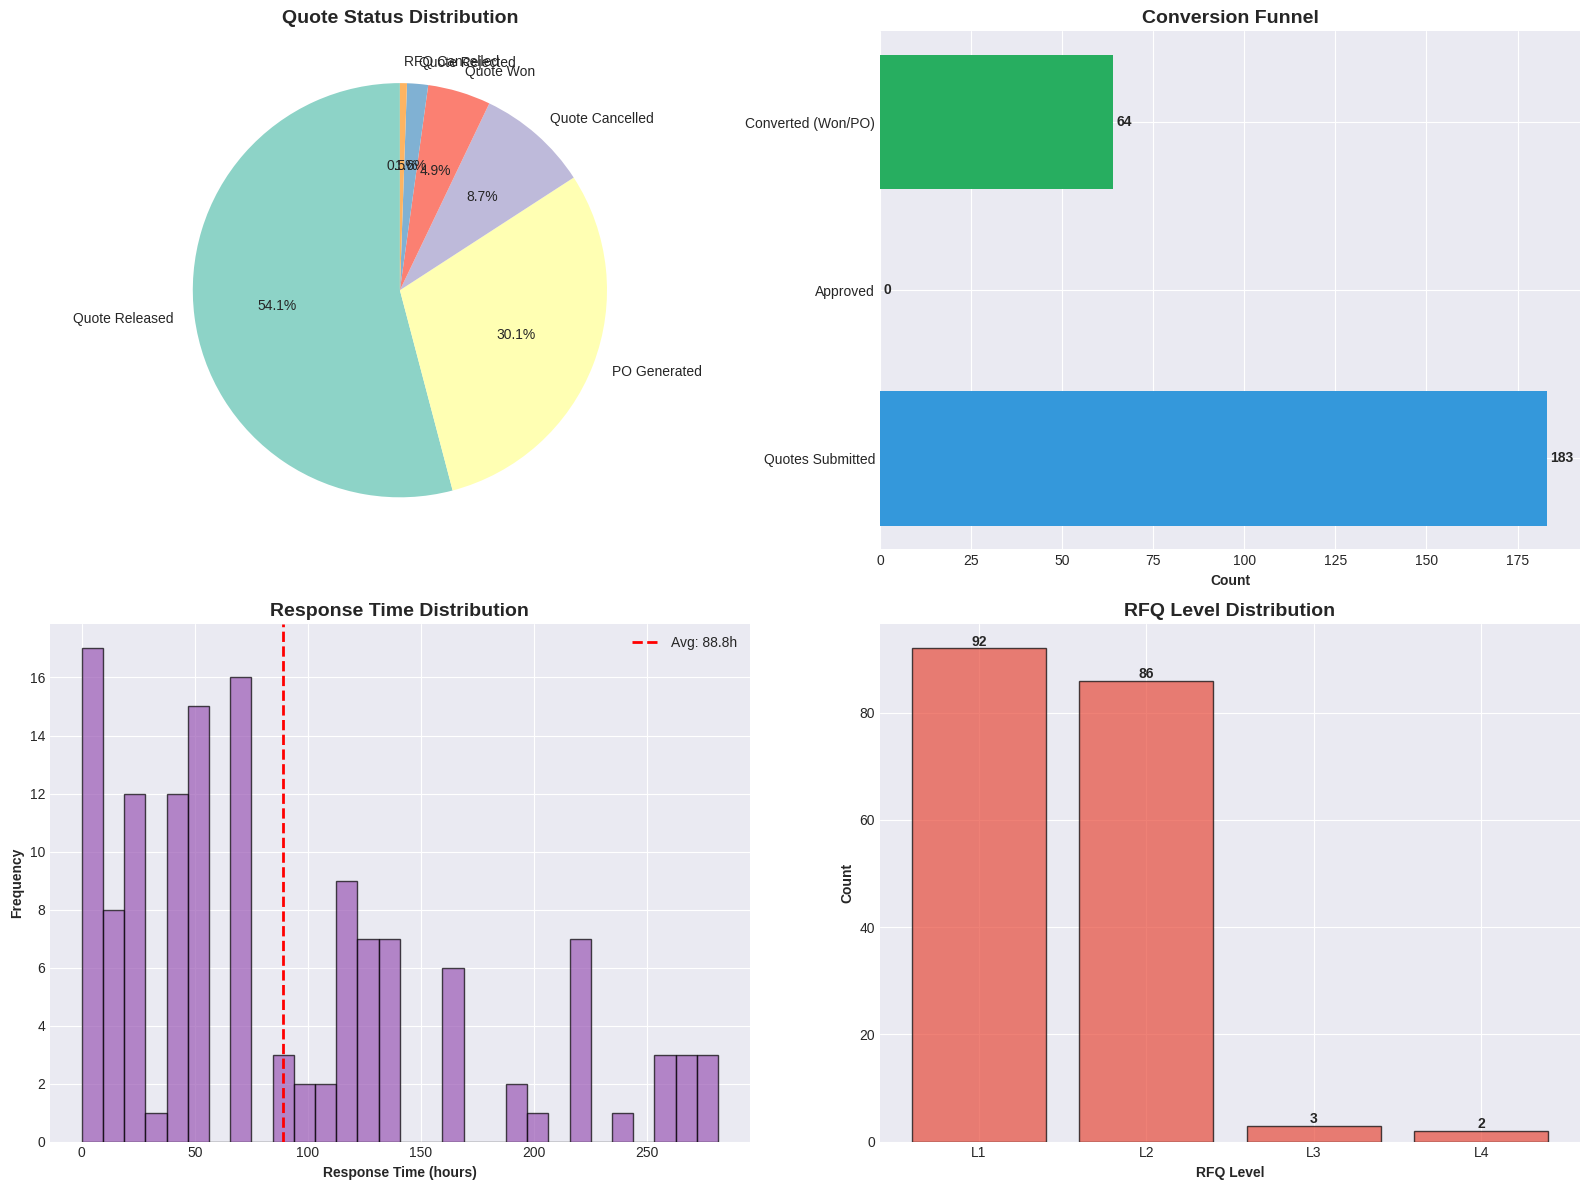

In [10]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Figure 1: Quote Status Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Quote Status Distribution (Pie Chart)
status_counts = df['seller_status'].value_counts()
colors = plt.cm.Set3(range(len(status_counts)))
axes[0, 0].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=colors)
axes[0, 0].set_title('Quote Status Distribution', fontsize=14, fontweight='bold')

# 2. Conversion Funnel (Bar Chart)
funnel_data = pd.DataFrame({
    'Stage': ['Quotes Submitted', 'Approved', 'Converted (Won/PO)'],
    'Count': [quotes_submitted, approved, converted_count]
})
axes[0, 1].barh(funnel_data['Stage'], funnel_data['Count'], color=['#3498db', '#f39c12', '#27ae60'])
axes[0, 1].set_xlabel('Count', fontweight='bold')
axes[0, 1].set_title('Conversion Funnel', fontsize=14, fontweight='bold')
for i, v in enumerate(funnel_data['Count']):
    axes[0, 1].text(v + 1, i, str(v), va='center', fontweight='bold')

# 3. Response Time Distribution (Histogram)
valid_times = df[df['response_time_hours'] > 0]['response_time_hours']
axes[1, 0].hist(valid_times, bins=30, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(avg_response_time, color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_response_time:.1f}h')
axes[1, 0].set_xlabel('Response Time (hours)', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title('Response Time Distribution', fontsize=14, fontweight='bold')
axes[1, 0].legend()

# 4. RFQ Level Distribution (Bar Chart)
level_counts = df['level'].value_counts().sort_index()
axes[1, 1].bar(level_counts.index, level_counts.values, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('RFQ Level', fontweight='bold')
axes[1, 1].set_ylabel('Count', fontweight='bold')
axes[1, 1].set_title('RFQ Level Distribution', fontsize=14, fontweight='bold')
for i, v in enumerate(level_counts.values):
    axes[1, 1].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipykernel_445654/699994270.py:28: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_time['month'] = df_time['created_at'].dt.to_period('M')
/tmp/ipykernel_445654/699994270.py:37: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion_by_level = df.groupby('level').apply(


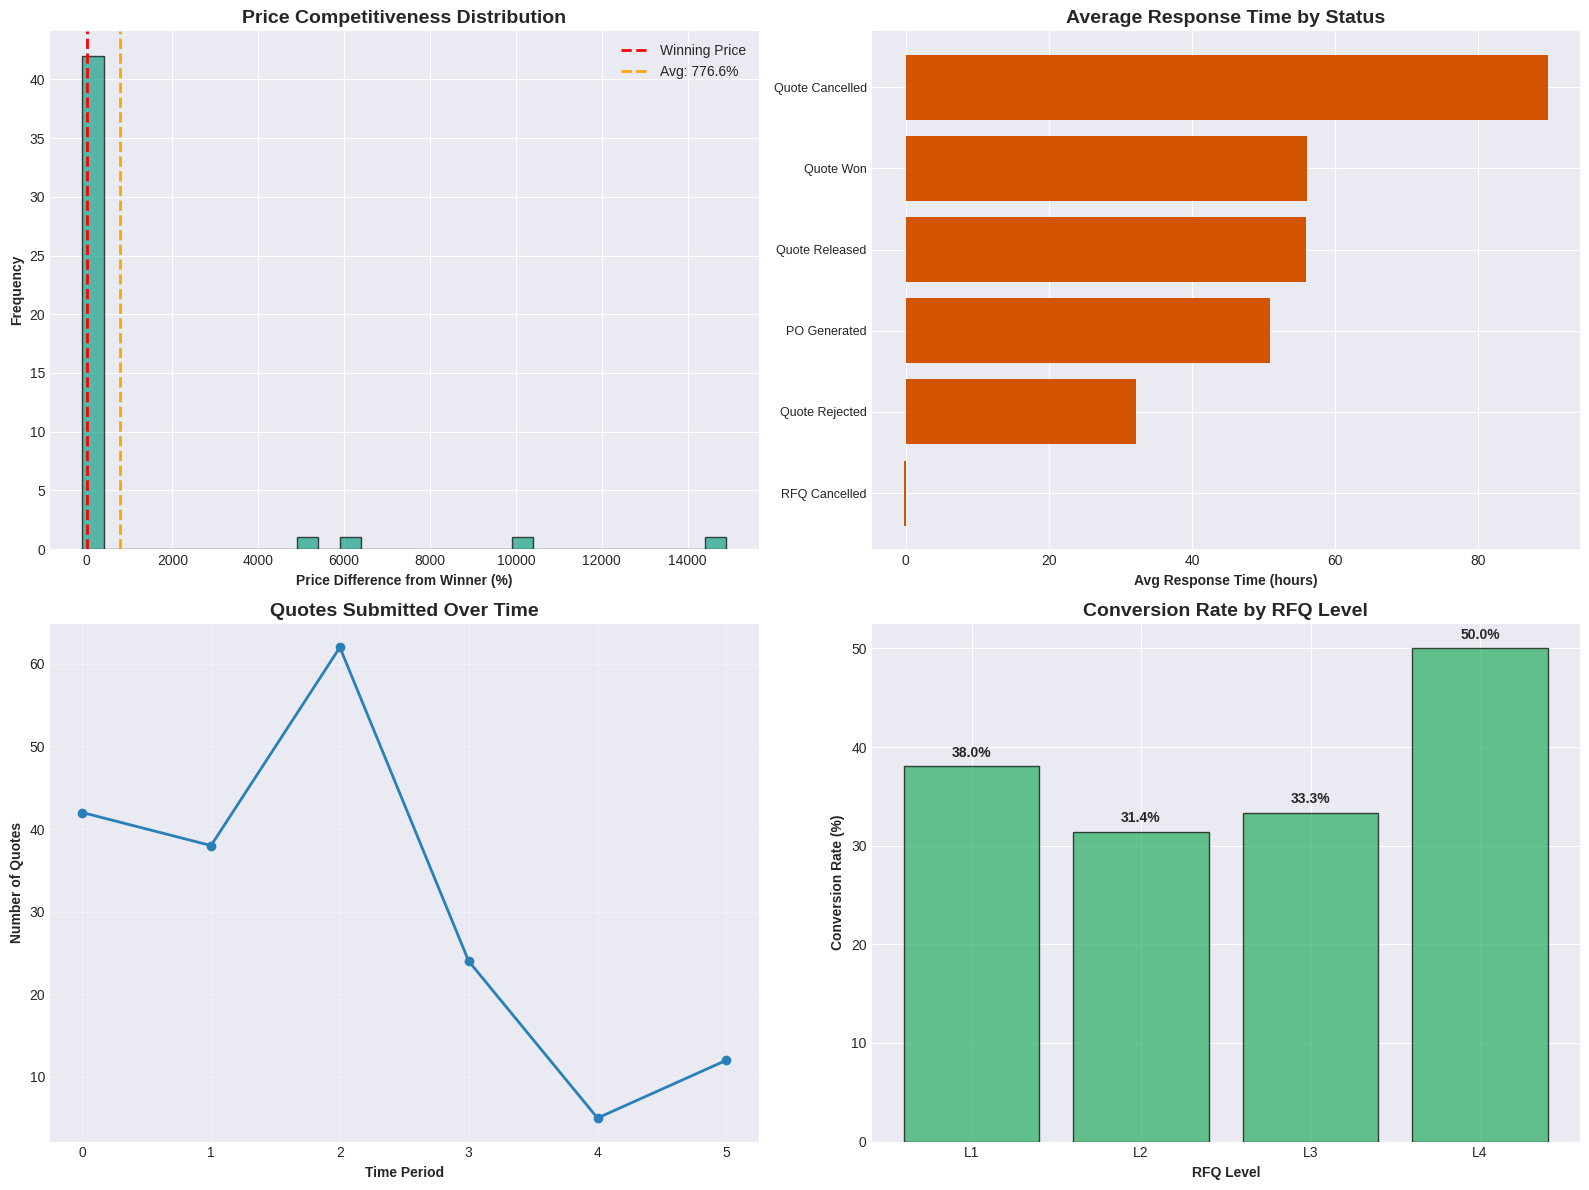

In [11]:
# Figure 2: Price Competitiveness and Time Trends
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Price Competitiveness Distribution
if len(price_comp_df) > 0:
    axes[0, 0].hist(price_comp_df['price_diff_pct'], bins=30, color='#16a085', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Winning Price')
    axes[0, 0].axvline(avg_price_diff, color='orange', linestyle='--', linewidth=2, label=f'Avg: {avg_price_diff:.1f}%')
    axes[0, 0].set_xlabel('Price Difference from Winner (%)', fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontweight='bold')
    axes[0, 0].set_title('Price Competitiveness Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].legend()
else:
    axes[0, 0].text(0.5, 0.5, 'Insufficient Data', ha='center', va='center', fontsize=14)
    axes[0, 0].set_title('Price Competitiveness Distribution', fontsize=14, fontweight='bold')

# 2. Response Time by Status
status_response = df.groupby('seller_status')['response_time_hours'].mean().sort_values()
status_response = status_response[status_response.notna()].head(10)
axes[0, 1].barh(range(len(status_response)), status_response.values, color='#d35400')
axes[0, 1].set_yticks(range(len(status_response)))
axes[0, 1].set_yticklabels(status_response.index, fontsize=9)
axes[0, 1].set_xlabel('Avg Response Time (hours)', fontweight='bold')
axes[0, 1].set_title('Average Response Time by Status', fontsize=14, fontweight='bold')

# 3. Quotes Over Time
df_time = df[df['created_at'].notna()].copy()
df_time['month'] = df_time['created_at'].dt.to_period('M')
monthly_quotes = df_time.groupby('month').size()
axes[1, 0].plot(range(len(monthly_quotes)), monthly_quotes.values, marker='o', color='#2980b9', linewidth=2)
axes[1, 0].set_xlabel('Time Period', fontweight='bold')
axes[1, 0].set_ylabel('Number of Quotes', fontweight='bold')
axes[1, 0].set_title('Quotes Submitted Over Time', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Conversion Rate by Level
conversion_by_level = df.groupby('level').apply(
    lambda x: (len(x[x['seller_status'].isin(conversion_statuses)]) / len(x)) * 100
).sort_index()
axes[1, 1].bar(conversion_by_level.index, conversion_by_level.values, color='#27ae60', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('RFQ Level', fontweight='bold')
axes[1, 1].set_ylabel('Conversion Rate (%)', fontweight='bold')
axes[1, 1].set_title('Conversion Rate by RFQ Level', fontsize=14, fontweight='bold')
for i, v in enumerate(conversion_by_level.values):
    axes[1, 1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Export Results for Superset/Dashboard

In [12]:
# Export KPI summary for dashboard
kpi_export = pd.DataFrame({
    'kpi_name': [
        'rfqs_received',
        'quotes_submitted',
        'conversion_rate',
        'avg_response_time_hours',
        'avg_response_time_days',
        'avg_price_competitiveness_pct',
        'converted_quotes',
        'pending_quotes',
        'cancelled_quotes',
        'avg_quotes_per_rfq'
    ],
    'kpi_value': [
        rfqs_received,
        quotes_submitted,
        conversion_rate,
        avg_response_time,
        avg_response_time / 24,
        avg_price_diff if len(price_comp_df) > 0 else None,
        converted_count,
        pending,
        cancelled,
        quotes_submitted / rfqs_responded_to
    ]
})

# Export detailed quote data with calculated metrics
df_export = df.copy()
df_export['is_converted'] = df_export['seller_status'].isin(conversion_statuses).astype(int)
df_export['is_pending'] = df_export['seller_status'].str.contains('pending|waiting', na=False, case=False).astype(int)
df_export['is_cancelled'] = df_export['seller_status'].str.contains('cancel|reject', na=False, case=False).astype(int)
df_export['effective_price'] = df_export['unitPrice'] * (1 - df_export['discount_percentage'] / 100)

# Save exports
kpi_export.to_csv('/home/user/Downloads/rfq_kpi_summary.csv', index=False)
df_export.to_csv('/home/user/Downloads/rfq_detailed_analysis.csv', index=False)

if len(price_comp_df) > 0:
    price_comp_df.to_csv('/home/user/Downloads/rfq_price_competitiveness.csv', index=False)

print("\nExported files:")
print("  /home/user/Downloads/rfq_kpi_summary.csv - KPI metrics")
print("  /home/user/Downloads/rfq_detailed_analysis.csv - Detailed quote data with calculated fields")
if len(price_comp_df) > 0:
    print("  /home/user/Downloads/rfq_price_competitiveness.csv - Price competitiveness analysis")
    
print("\nThese files can be uploaded to Superset or PostgreSQL for dashboard creation")


Exported files:
  /home/user/Downloads/rfq_kpi_summary.csv - KPI metrics
  /home/user/Downloads/rfq_detailed_analysis.csv - Detailed quote data with calculated fields
  /home/user/Downloads/rfq_price_competitiveness.csv - Price competitiveness analysis

These files can be uploaded to Superset or PostgreSQL for dashboard creation
